In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imoveis = pd.read_csv("bases/Valorizacao_Ambiental.csv", sep=";")

In [3]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [8]:
print("Shape: ", imoveis.shape)
imoveis.info()

Shape:  (172, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [5]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [7]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


### Identifying variable target

Text(0.5, 1.0, 'Histograma da variável valor')

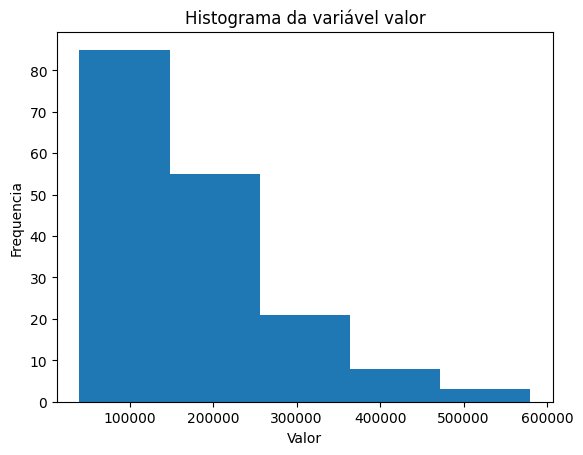

In [9]:
plt.hist(imoveis["Valor"],bins=5)

plt.xlabel("Valor")
plt.ylabel("Frequencia")
plt.title("Histograma da variável valor")

In [10]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

In [11]:
imoveis

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131
...,...,...,...,...,...,...,...,...,...,...,...
167,168,80000,82,14,2,0,0,485,1,0,282.842712
168,169,144000,134,11,2,0,1,827,1,1,379.473319
169,170,176000,135,9,3,2,1,414,1,1,419.523539
170,171,199956,141,1,6,2,0,305,0,0,447.164399


Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada aplicada')

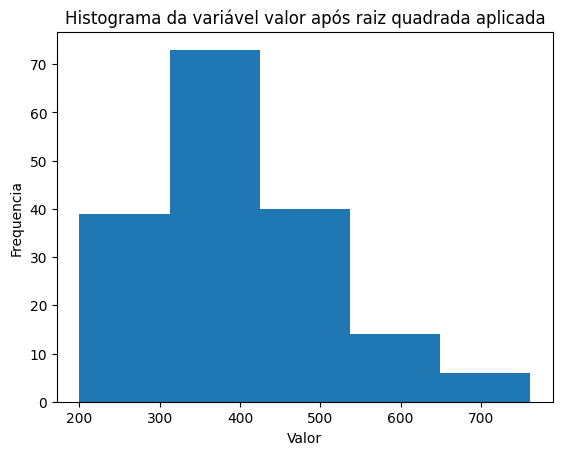

In [12]:
plt.hist(imoveis["raiz_valor"],bins=5)

plt.xlabel("Valor")
plt.ylabel("Frequencia")
plt.title("Histograma da variável valor após raiz quadrada aplicada")

Text(0, 0.5, 'Qtd de suites')

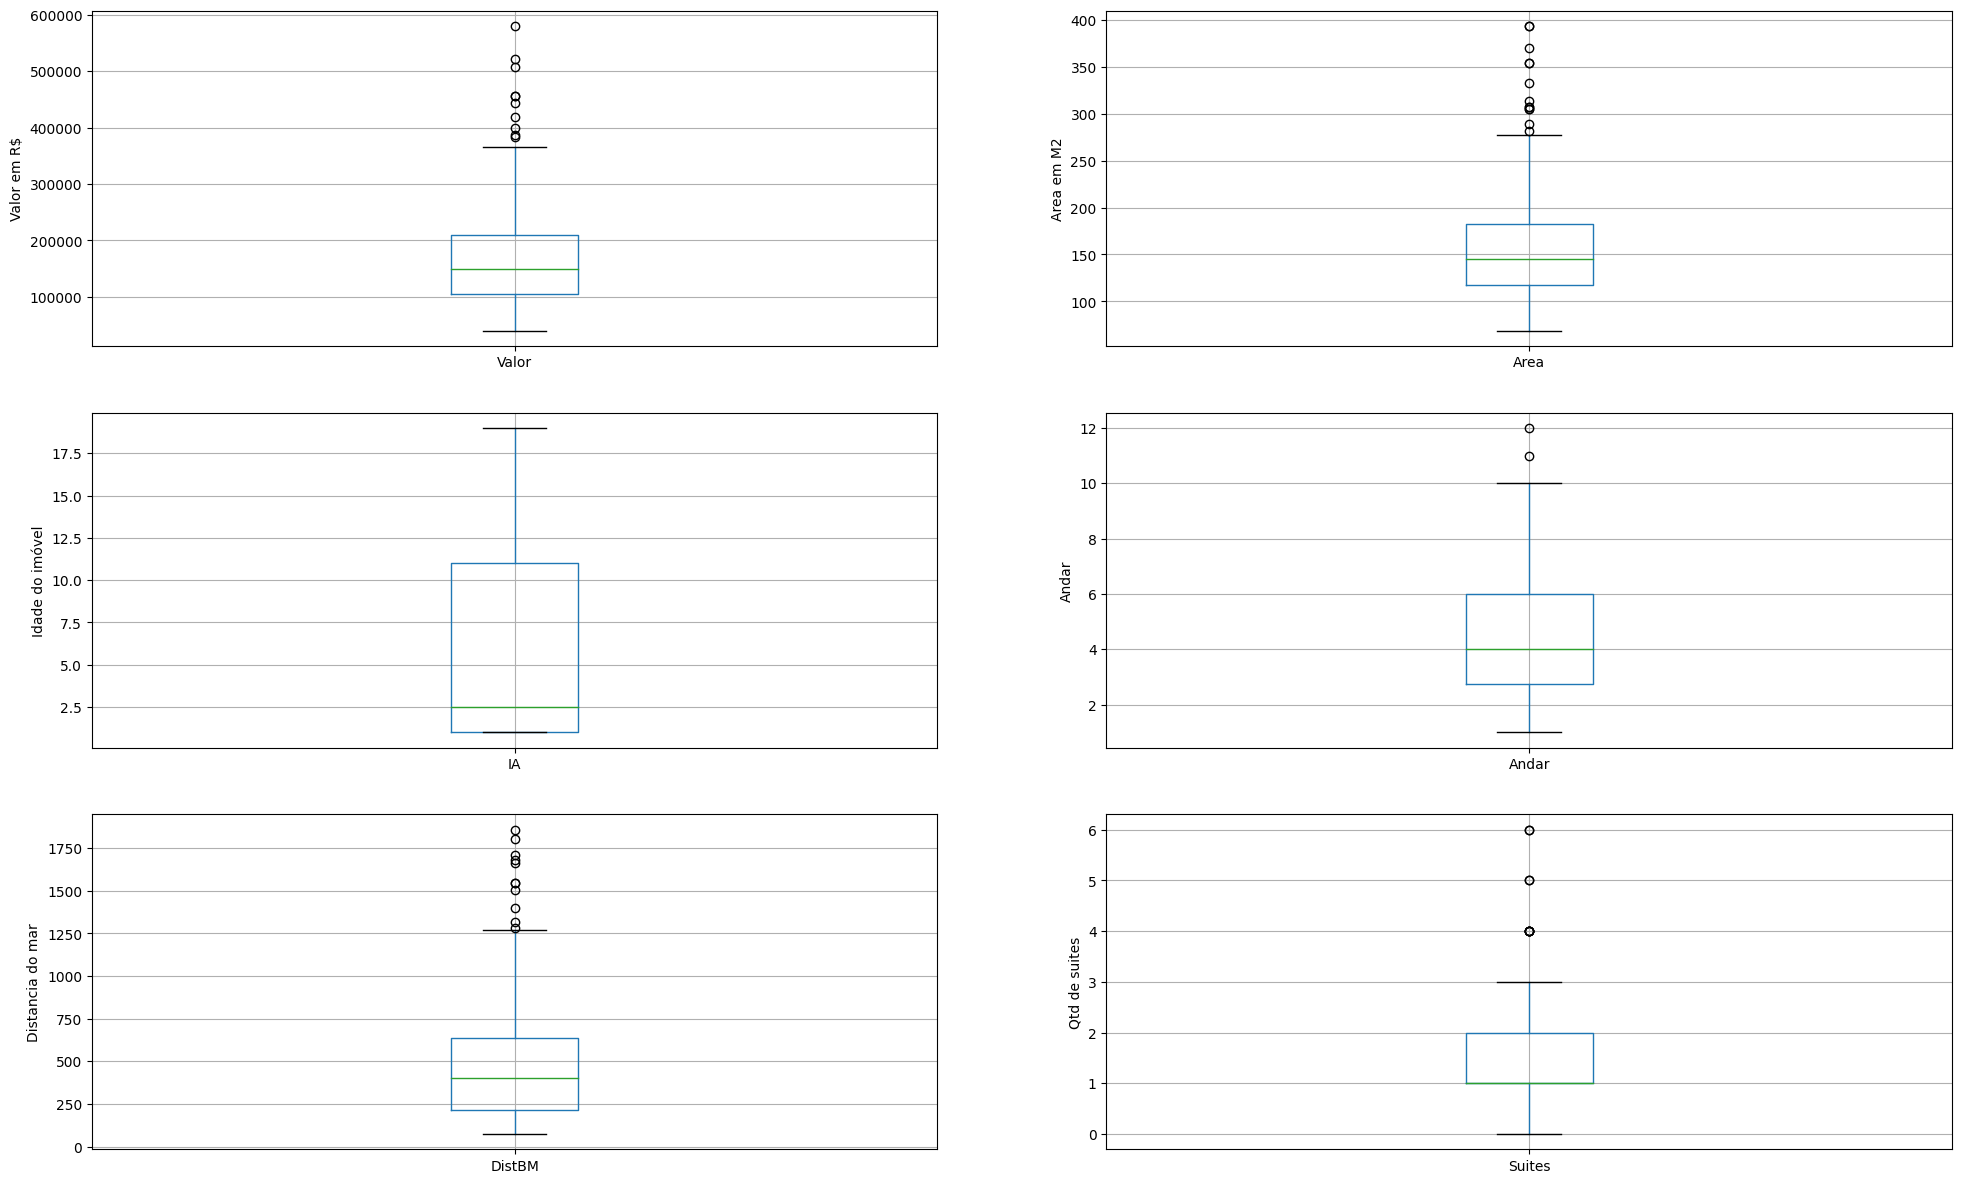

In [13]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column="Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column="Area")
fig.set_title("")
fig.set_ylabel("Area em M2")

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column="IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column="Andar")
fig.set_title("")
fig.set_ylabel("Andar")

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column="DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column="Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")


<Axes: >

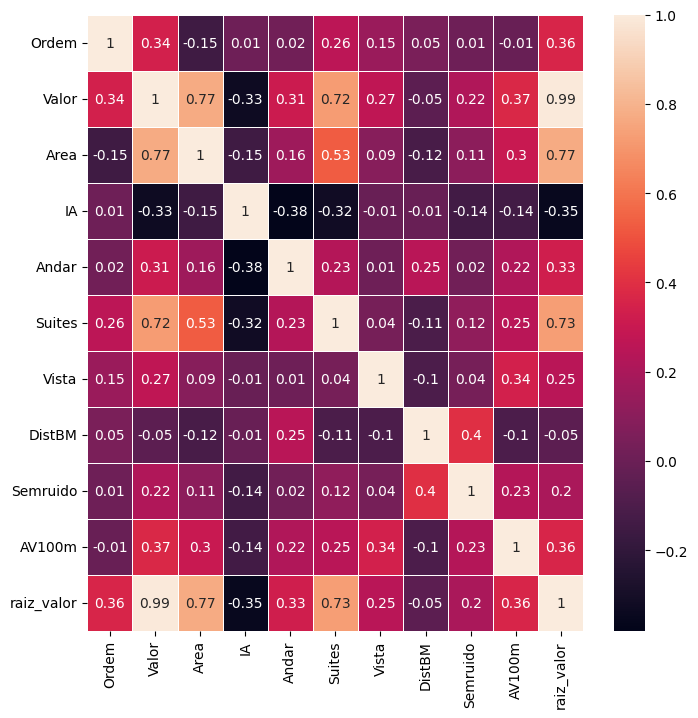

In [14]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Area do imóvel x Valor')

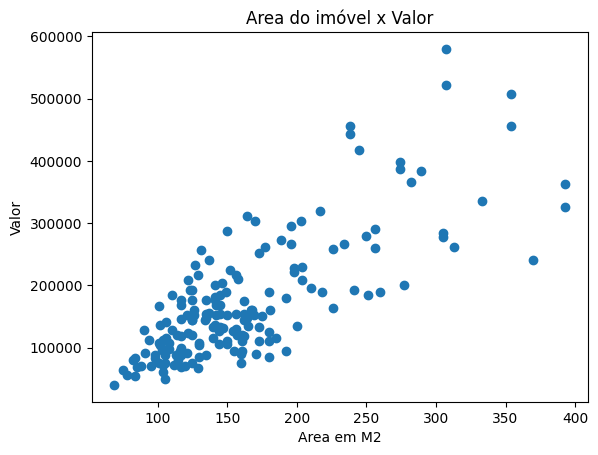

In [15]:
plt.scatter("Area","Valor", data=imoveis)
plt.xlabel("Area em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x Valor")

Text(0.5, 1.0, 'Idade do imóvel x Valor')

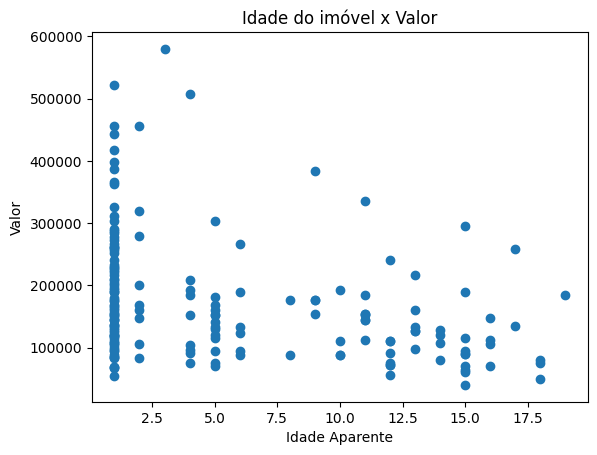

In [16]:
plt.scatter("IA","Valor", data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title("Idade do imóvel x Valor")

/tmp/ipykernel_4518/4049628597.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vista", y="Valor", data=imoveis, palette='hls')


<Axes: xlabel='Vista', ylabel='Valor'>

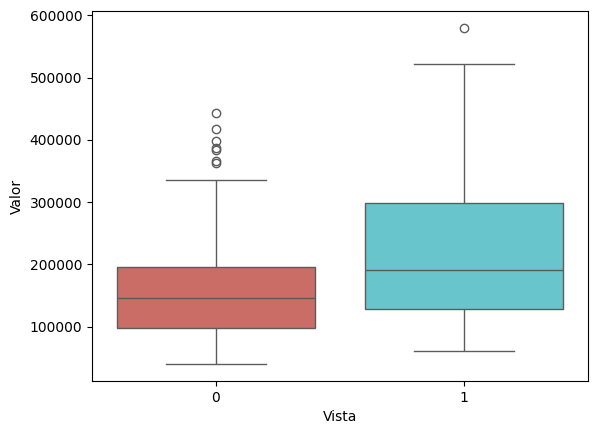

In [17]:
sns.boxplot(x="Vista", y="Valor", data=imoveis, palette='hls')

<Axes: ylabel='Valor'>

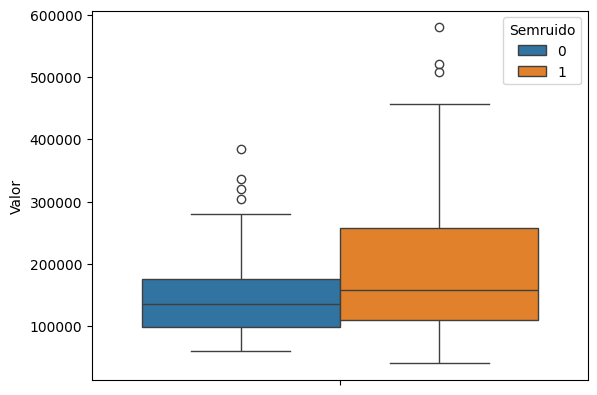

In [21]:
sns.boxplot(hue="Semruido", y="Valor", data=imoveis, legend=True)

<Axes: ylabel='Valor'>

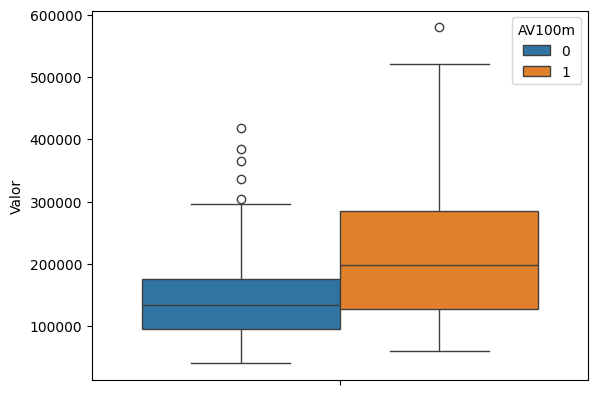

In [22]:
sns.boxplot(hue="AV100m", y="Valor", data=imoveis, legend=True)

### Linear Regression

Um modelo de regressão linear é uma técnica estatística usada para modelar o relacionamento entre uma variável dependente contínua e uma ou mais variáveis independentes. A regressão linear assume que existe uma relação linear entre as variáveis envolvidas, ou seja, a relação pode ser aproximada por uma linha reta.

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [25]:
# variaveis preditoras / independentes
X = imoveis[['Area','Suites','IA','Semruido','Vista','Andar','AV100m','DistBM']]

# variavel target / dependente
y = imoveis[['Valor']]

In [27]:
from sklearn.model_selection import train_test_split

# separar dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [28]:
# treinar o modelo
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)

In [30]:
# Intercepto: ponto onde a linha de regressão cruza o eixo vertical (eixo y)
# representa o valor esperado da variavel dependente quando as variaveis independentes são iguais

print('Intercepto: ', lr.intercept_)

Intercepto:  [-40165.8752773]


In [31]:
# Coeficientes da regressão linear representam as inclinações da linha de regressão para cada variavel

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


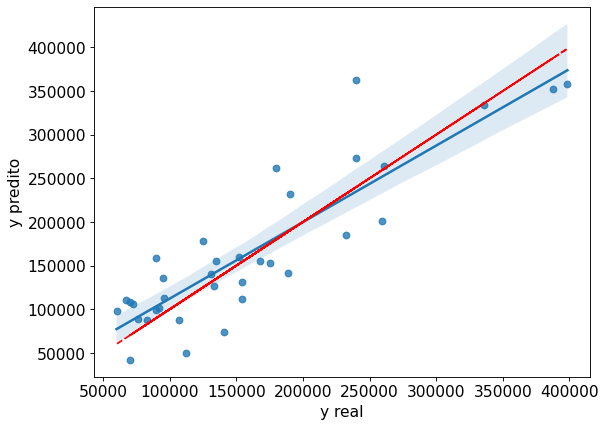

In [32]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x = y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression\n")
print('MAE: ',MAE) # mean absolute error eh a media do valor absoluto dos erros
print('MSE: ', MSE) # erro quadratico medio eh a media dos erros quadraticos
print('r^2: ',r2) # r quadrado

Linear Regression

MAE:  34422.988570945454
MSE:  1844288772.1789546
r^2:  0.7584591969125075


### Decision Tree Regressor

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [37]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [39]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)

print("Decision Tree Regressor\n")
print('MAE: ',MAE) # mean absolute error eh a media do valor absoluto dos erros
print('MSE: ', MSE) # erro quadratico medio eh a media dos erros quadraticos
print('r^2: ',r2) # r quadrado

Decision Tree Regressor

MAE:  44913.75102040816
MSE:  3223969337.3848395
r^2:  0.577766695417574


### Support Vector Regression

O SVR é usado para tarefas de regressão em que a tarefa é prever um valor contínuo em vez de uma classe.

In [40]:
from sklearn.svm import SVR

In [41]:
svr = SVR(kernel='linear')

In [42]:
svr.fit(x_train,y_train)

/home/jessimoura/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [43]:
y_pred_svr = svr.predict(x_test)

In [44]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Support Vector Regression\n")
print('MAE: ',MAE) # mean absolute error eh a media do valor absoluto dos erros
print('MSE: ', MSE) # erro quadratico medio eh a media dos erros quadraticos
print('r^2: ',r2) # r quadrado

Support Vector Regression

MAE:  43153.53918496288
MSE:  3123421996.7782364
r^2:  0.5909350700044546
